In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Perform EDA on below insurance dataset

### Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

### Perform All steps of EDA and document conclusions and then perform feature engineering.

In [10]:
df = pd.read_csv("D:\Jupyter\insurance_data.csv")
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [11]:
df.shape

(1340, 11)

In [12]:
df.tail()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [13]:
df.sample(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
274,274,275,24.0,male,37.3,99,Yes,2,No,southeast,4058.12
1177,1177,1178,55.0,female,27.7,111,Yes,0,Yes,northeast,29523.17
176,176,177,30.0,male,17.4,89,No,1,No,northwest,2775.19
1251,1251,1252,21.0,male,31.4,89,Yes,1,Yes,northeast,39556.49
639,639,640,22.0,male,32.2,95,Yes,0,No,northwest,8835.26
457,457,458,50.0,female,42.9,98,No,3,No,northwest,6360.99
1093,1093,1094,59.0,female,24.9,108,No,3,Yes,northeast,21659.93
237,237,238,48.0,female,25.2,82,No,0,No,southeast,3558.62
1015,1015,1016,47.0,male,29.1,97,No,0,Yes,northwest,17352.68
665,665,666,44.0,male,29.8,82,Yes,1,No,northeast,9288.03


In [14]:
df.duplicated().sum()

0

In [15]:
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [16]:
df[["age","bmi","bloodpressure","claim"]].describe()

,age,bmi,bloodpressure,claim
count,1335.000000,1340.000000,1340.000000,1340.000000
mean,38.078652,30.668955,94.157463,13252.745642
std,11.102924,6.106735,11.434712,12109.609288
min,18.000000,16.000000,80.000000,1121.870000
25%,29.000000,26.275000,86.000000,4719.685000
50%,38.000000,30.400000,92.000000,9369.615000
75%,47.000000,34.700000,99.000000,16604.305000
max,60.000000,53.100000,140.000000,63770.430000


#### Columns Type
- Numerical - index,PatientID,age,bmi,bloodpressure,claim
- Categorical - gender,diabetic,children,smoker,region


### index,PatientID
#### Conclusion : both column contains unique digits , Unnecessary extra index column drop index column and set PatientID as index

In [17]:
df.drop(columns="index",inplace=True)

In [18]:
df = df.set_index("PatientID")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 1 to 1340
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 104.7+ KB


### Age column
#### Conclusion : 
- age column contains 5 missing values because of missing values dtype is float change to int
- distribution of data looks almost normal 

In [20]:
df["age"].isna().sum()

5

In [21]:
df["age"].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

<AxesSubplot: ylabel='Frequency'>

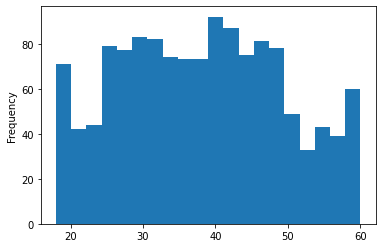

In [22]:
df["age"].plot(kind="hist",bins=20)

<AxesSubplot: ylabel='Density'>

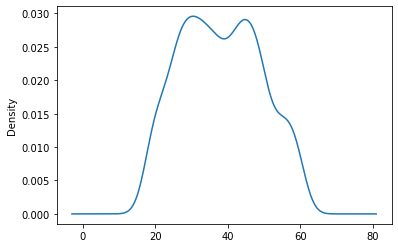

In [23]:
df["age"].plot(kind="kde")

<AxesSubplot: >

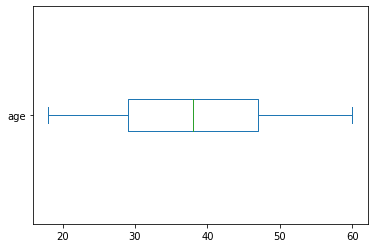

In [24]:
df["age"].plot(kind="box",vert=False)

In [25]:
df["age"].skew()

0.11361133741072633

### gender columns
#### Conclusion:
- with mean value 30.66 most of the people looks owerwaight but after noticing max value it looks like mean is manipulated by outliers
- shape of distribution looks normal
- outlier values are there
- by category conclusion mean amount of claim by Obese is more than other categories

In [26]:
df["bmi"].isna().sum()

0

In [27]:
df["bmi"].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [28]:
def bmicat(num):
    if num < 18.5:
        return "underweight"
    elif num >= 18.5 and num<25:
        return "normal"
    elif num >= 25 and num <= 30:
        return "overweight"
    elif num > 30:
        return "obesity"
    else:
        return num

In [29]:
df["bmi_cat"] = df["bmi"].apply(bmicat)

<AxesSubplot: ylabel='Frequency'>

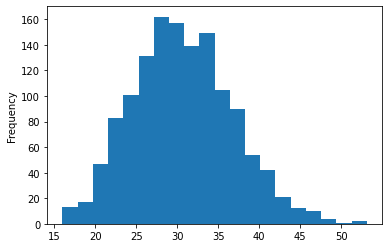

In [39]:
df["bmi"].plot(kind="hist",bins=20)

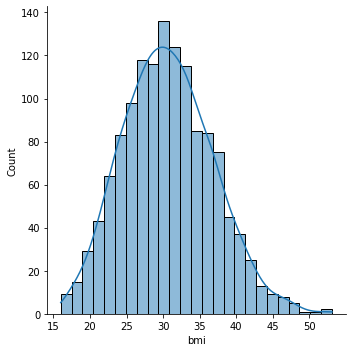

In [38]:
sns.displot(data=df,x="bmi",kind="hist",kde=True)

<AxesSubplot: ylabel='Density'>

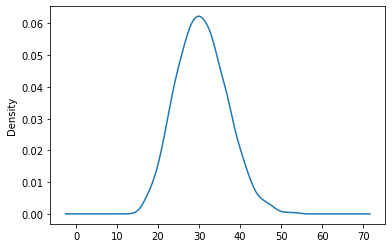

In [31]:
df["bmi"].plot(kind="kde")

In [32]:
df["bmi"].skew()

0.28597245020808587

<AxesSubplot: >

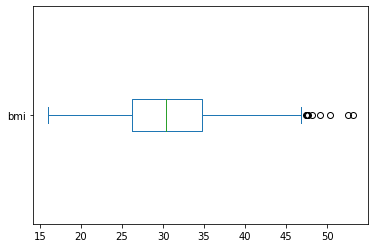

In [53]:
df["bmi"].plot(kind="box",vert=False)

In [50]:
df["bmi_cat"].value_counts()

obesity        699
overweight     398
normal         223
underweight     20
Name: bmi_cat, dtype: int64

<AxesSubplot: ylabel='bmi_cat'>

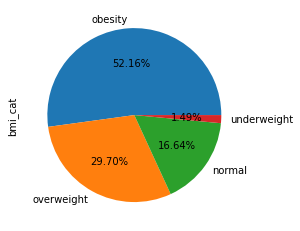

In [45]:
df["bmi_cat"].value_counts().plot(kind="pie",autopct="%0.2f%%")

<AxesSubplot: >

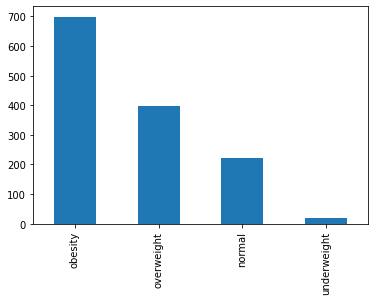

In [49]:
df["bmi_cat"].value_counts().plot(kind="bar")

<AxesSubplot: xlabel='bmi_cat'>

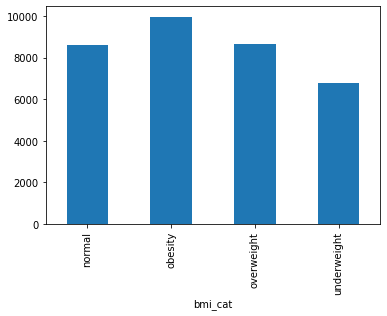

In [56]:
df.groupby("bmi_cat")["claim"].median().plot(kind="bar")

<AxesSubplot: xlabel='bmi_cat'>

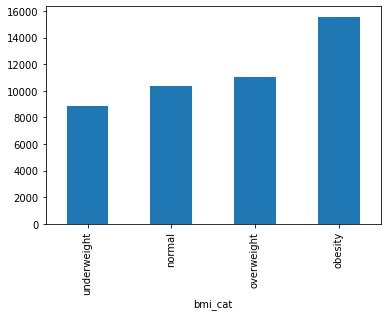

In [61]:
df.groupby("bmi_cat")["claim"].mean().sort_values().plot(kind="bar")

In [55]:
df[df["bmi"] > 47]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,
10,30.0,male,53.1,97,No,0,No,northwest,1163.46
142,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
580,25.0,male,47.5,84,Yes,1,No,southeast,8083.92
676,49.0,female,48.1,81,Yes,2,No,northeast,9432.93
697,49.0,male,47.7,88,No,1,No,southeast,9748.91
803,42.0,male,49.1,109,Yes,0,No,southeast,11381.33
1300,50.0,male,52.6,110,No,1,Yes,southeast,44501.40
1307,43.0,female,47.6,112,Yes,2,Yes,southwest,46113.51
1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [62]:
# average age for each bmi category is almost same
df.groupby("bmi_cat")["age"].mean()

bmi_cat
normal         38.017937
obesity        37.541787
overweight     39.027638
underweight    38.500000
Name: age, dtype: float64

In [63]:
df.groupby("bmi_cat")["age"].median()

bmi_cat
normal         37.0
obesity        37.0
overweight     39.0
underweight    35.0
Name: age, dtype: float64

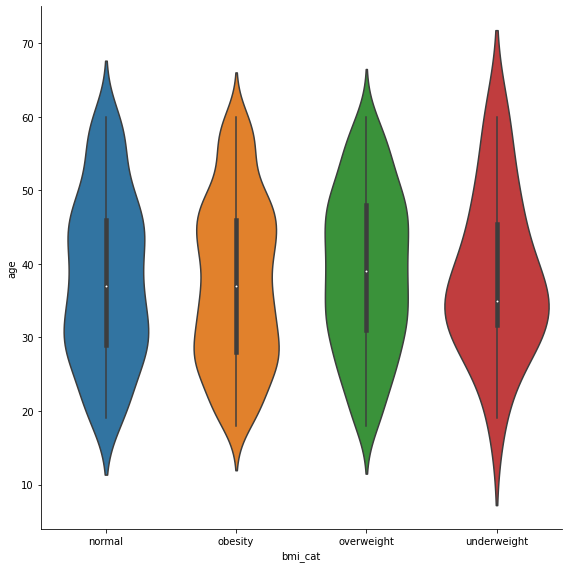

In [66]:
# distribution of "age" for each BMI category
sns.catplot(x="bmi_cat", y="age", data=df, kind="violin",height=8)
plt.show()
# "normal" and "obesity" tend to the bi-modal distribution. The peak width of
# "overweight" is much spread out. Also, the "underweight" age distribution is
# right skewed. Also can see the medians which are discovered to the above. The
# IQR of "overweight" is higher compared to others. 

### bloodpressure column
#### Conclusion
- mean value manipulated by outliers
- data slighlt positively skewed
- otliers in data

In [58]:
df["bloodpressure"].isna().sum()

0

In [59]:
df["bloodpressure"].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<AxesSubplot: ylabel='Frequency'>

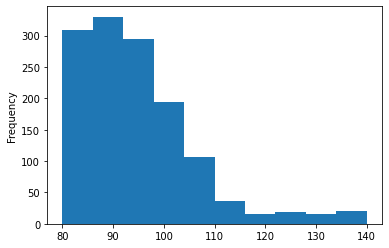

In [60]:
df["bloodpressure"].plot(kind="hist")

<AxesSubplot: ylabel='Density'>

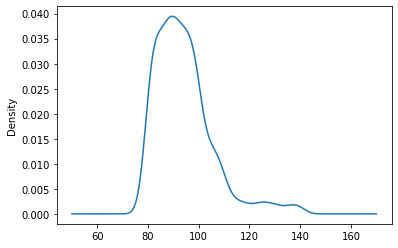

In [61]:
df["bloodpressure"].plot(kind="kde")

In [62]:
df["bloodpressure"].skew()

1.4835342102293079

<AxesSubplot: >

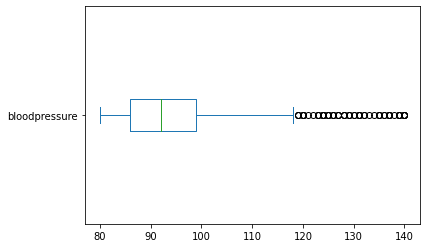

In [64]:
df["bloodpressure"].plot(kind="box",vert=False)

In [80]:
df[df["bloodpressure"] > 135]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,
1157,46.0,female,23.0,137,Yes,0,Yes,southeast,27037.91
1162,22.0,male,22.4,137,Yes,2,No,northeast,27375.90
1175,44.0,female,29.1,139,No,0,Yes,northwest,29141.36
1197,36.0,female,31.4,136,Yes,0,Yes,southwest,34166.27
1198,30.0,male,31.1,136,No,0,Yes,northeast,34254.05
1211,25.0,male,30.8,140,Yes,0,Yes,southwest,35491.64
1226,50.0,female,34.8,140,Yes,2,No,southwest,36910.61
1227,46.0,male,35.5,140,Yes,0,Yes,southeast,36950.26
1231,58.0,female,30.8,139,No,0,Yes,northeast,37270.15


In [67]:
# can categorize the blood-pressure also.
def blood_pressure_cat(value):
    if pd.isna(value):
        return np.nan
    
    if value < 120:
        return "normal"
    elif value >= 120 and value < 130:
        return "elevated"
    elif value >= 130 and value < 140:
        return "hbp-stage1" # high blood pressure stage 1
    elif value >= 140 and value < 180:
        return "hbp-stage2" # high blood pressure stage 2
    elif value >= 180:
        return "hypertensive_crisis"
    else:
        return value

# now convert the bloodpressure to categorical
df["blood_pressure_cat"] = df["bloodpressure"].apply(
    lambda x: blood_pressure_cat(x)
).copy()

### claim column
#### Conclusion
- data is positively skewed
- median value is less than mean due to skewness 

In [74]:
df["claim"].isna().sum()

0

In [68]:
df["claim"].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

<AxesSubplot: ylabel='Frequency'>

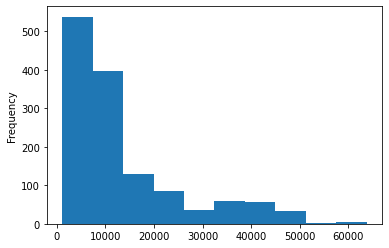

In [69]:
df["claim"].plot(kind="hist")

<AxesSubplot: ylabel='Density'>

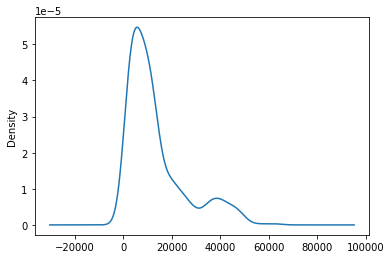

In [70]:
df["claim"].plot(kind="kde")

<AxesSubplot: >

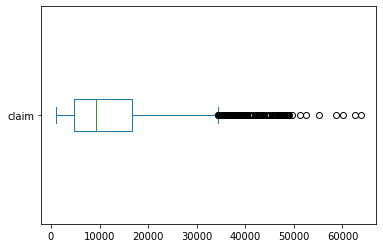

In [72]:
df["claim"].plot(kind="box",vert=False)

In [77]:
df[df["claim"] > 50000]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,
1334,44.0,male,36.4,127,No,1,Yes,southwest,51194.56
1335,43.0,male,32.8,125,No,0,Yes,southwest,52590.83
1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


### gender column
#### Conclusion :
- Normal distribution 50% male 50% female

In [87]:
df["gender"].unique()

array(['male', 'female'], dtype=object)

In [93]:
df["gender"].value_counts()

male      678
female    662
Name: gender, dtype: int64

<AxesSubplot: >

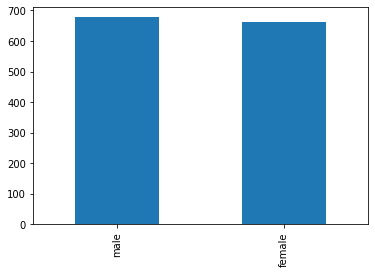

In [89]:
df["gender"].value_counts().plot(kind="bar")

<AxesSubplot: ylabel='gender'>

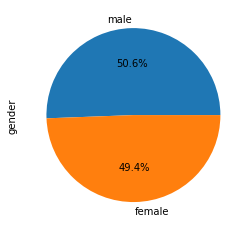

In [91]:
df["gender"].value_counts().plot(kind="pie",autopct="%0.1f%%")

In [100]:
df[df["gender"] == "male"].describe()

,age,bmi,bloodpressure,children,claim
count,673.000000,678.000000,678.000000,678.000000,678.000000
mean,33.745914,30.951327,94.297935,1.112094,13919.790457
std,9.610073,6.156323,11.662652,1.218688,12969.700466
min,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,25.000000,26.400000,86.000000,0.000000,4523.187500
50%,34.000000,30.700000,92.000000,1.000000,9333.015000
75%,43.000000,35.075000,99.000000,2.000000,18970.167500
max,50.000000,53.100000,140.000000,5.000000,62592.870000


In [101]:
df[df["gender"] == "female"].describe()

,age,bmi,bloodpressure,children,claim
count,662.000000,662.000000,662.000000,662.000000,662.000000
mean,42.483384,30.379758,94.013595,1.074018,12569.578897
std,10.786704,6.046508,11.203446,1.192115,11128.703817
min,25.000000,16.800000,80.000000,0.000000,1607.510000
25%,33.000000,26.100000,86.000000,0.000000,4885.162500
50%,43.000000,30.100000,93.000000,1.000000,9412.965000
75%,52.000000,34.300000,99.000000,2.000000,14454.690000
max,60.000000,48.100000,140.000000,5.000000,63770.430000


### diabetic column
#### Conclusion
- 

In [92]:
df["diabetic"].value_counts()

No     698
Yes    642
Name: diabetic, dtype: int64

<AxesSubplot: >

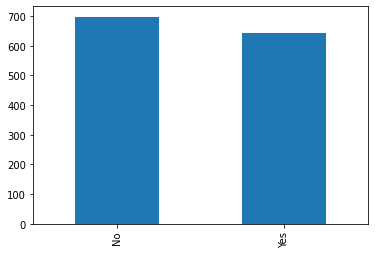

In [94]:
df["diabetic"].value_counts().plot(kind="bar")

<AxesSubplot: ylabel='diabetic'>

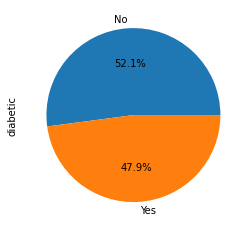

In [96]:
df["diabetic"].value_counts().plot(kind="pie",autopct="%0.1f%%")

<AxesSubplot: title={'center': 'BMI categories'}, ylabel='bmi_cat'>

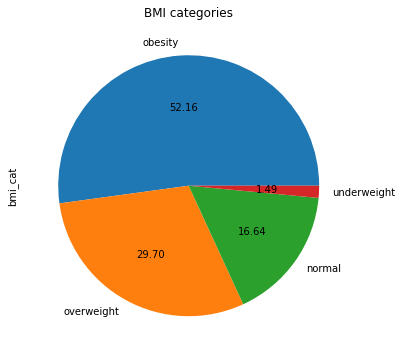

In [102]:
df["bmi_cat"].value_counts().plot.pie(title="BMI categories", autopct='%.2f', 
                                      figsize=(6, 6))

<AxesSubplot: xlabel='age', ylabel='claim'>

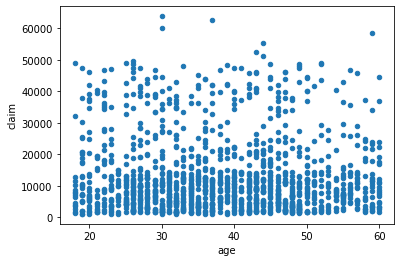

In [110]:
df.plot(kind="scatter",x="age",y="claim")